In [2]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import qda

# Import the dataset
data = pd.read_csv('230609_ex1.csv')

# Inspect the dataset
data.head()

,Sample,Concentration
0,1,8.36
1,2,12.72
2,3,8.60
3,4,7.72
4,5,5.97


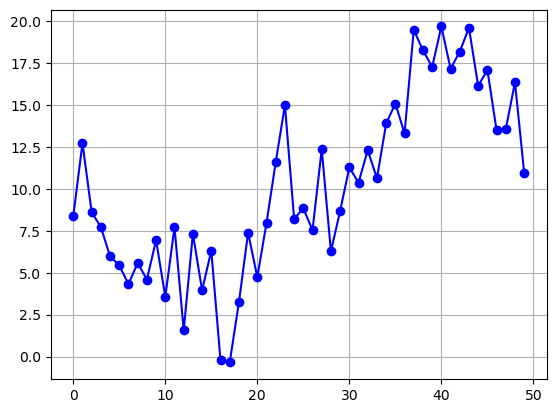

In [3]:
# Plot the data first
plt.plot(data['Concentration'], color='b', linestyle='-', marker='o')
plt.grid()
plt.show()

Runs test p-value = 0.000


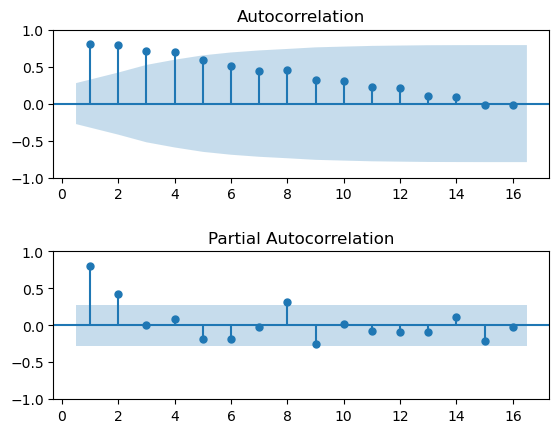

In [4]:
# Import the necessary libraries for the runs test
from statsmodels.sandbox.stats.runs import runstest_1samp

_, pval_runs = runstest_1samp(data['Concentration'], correction=False)
print('Runs test p-value = {:.3f}'.format(pval_runs))
# Plot the acf and pacf using the statsmodels library
import statsmodels.graphics.tsaplots as sgt

fig, ax = plt.subplots(2, 1)
sgt.plot_acf(data['Concentration'], lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(data['Concentration'], lags = int(len(data)/3), zero=False, ax=ax[1], method = 'ywm')
plt.show()


Shapiro-Wilk test p-value = 0.223


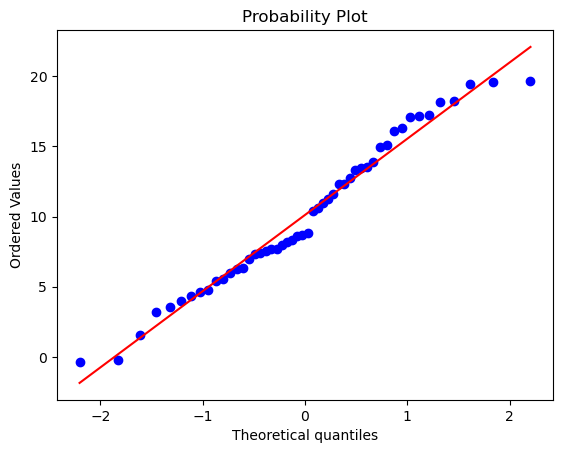

In [5]:
# Perform the Shapiro-Wilk test
_, pval_SW = stats.shapiro(data['Concentration'])
print('Shapiro-Wilk test p-value = %.3f' % pval_SW)

# Plot the qqplot
stats.probplot(data['Concentration'], dist="norm", plot=plt)
plt.show()

In [10]:
data['lag1'] = data['Concentration'].shift(1)
data['diff'] = data['Concentration'].diff(1)
data['dummy']=np.zeros(50)
data['dummy'][16:18]=1
# and split the dataset into regressors and target
X = data[['lag1','dummy']][1:]
y = data['Concentration'][1:]

c:\Users\Salam\anaconda3\envs\qda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [11]:
import qda
stepwise = qda.StepwiseRegression(add_constant = True, direction = 'both', alpha_to_enter = 0.15, alpha_to_remove = 0.15)

# Fit the model
model = stepwise.fit(y, X)

Stepwise Regression

######################################
### Step 1
-------------------
Forward Selection

COEFFICIENTS
------------
 Term   Coef    P-Value
const 2.0161 4.6302e-02
 lag1 0.8056 2.7251e-12

MODEL SUMMARY
-------------
     S   R-sq  R-sq(adj)
3.2266 0.6501     0.6426

######################################
### Step 2
-------------------
Forward Selection

COEFFICIENTS
------------
 Term    Coef    P-Value
const  2.7795 7.7827e-03
 lag1  0.7516 2.2383e-11
dummy -5.3544 2.5338e-02

MODEL SUMMARY
-------------
     S   R-sq  R-sq(adj)
3.0871 0.6865     0.6729
-------------------
Backward Elimination

No predictor removed.

######################################
### Step 3
-------------------
Forward Selection
All predictors have been included in the model. Exiting stepwise.
-------------------


In [12]:
results = model.model_fit
qda.summary(results)

REGRESSION EQUATION
-------------------
Concentration =  + 2.779 const + 0.752 lag1 -5.354 dummy

COEFFICIENTS
------------
 Term    Coef  SE Coef  T-Value    P-Value
const  2.7795   0.9986   2.7832 7.7827e-03
 lag1  0.7516   0.0857   8.7683 2.2383e-11
dummy -5.3544   2.3164  -2.3115 2.5338e-02

MODEL SUMMARY
-------------
     S   R-sq  R-sq(adj)
3.0871 0.6865     0.6729

ANALYSIS OF VARIANCE
---------------------
    Source   DF    Adj SS   Adj MS  F-Value    P-Value
Regression  2.0  960.0240 480.0120  50.3662 2.5902e-12
     const  1.0   73.8263  73.8263   7.7464 7.7827e-03
      lag1  1.0  732.7253 732.7253  76.8826 2.2383e-11
     dummy  1.0   50.9209  50.9209   5.3430 2.5338e-02
     Error 46.0  438.4003   9.5304      NaN        NaN
     Total 48.0 1398.4244      NaN      NaN        NaN


Shapiro-Wilk test p-value = 0.357


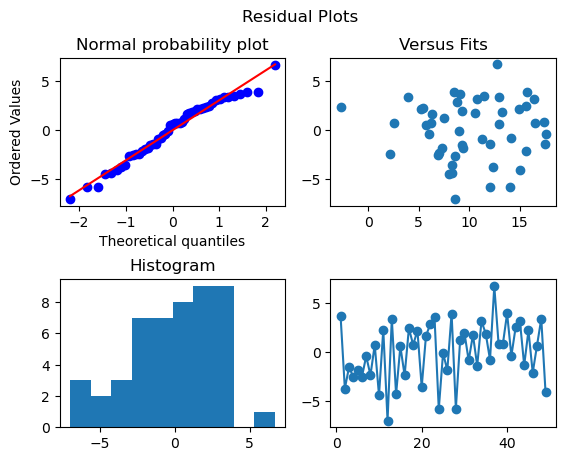

In [13]:
#Check on residuals
residuals = results.resid
fits = results.fittedvalues
# Perform the Shapiro-Wilk test
_, pval_SW = stats.shapiro(residuals)
print('Shapiro-Wilk test p-value = %.3f' % pval_SW)

# Plot the residuals
fig, axs = plt.subplots(2, 2)
fig.suptitle('Residual Plots')
stats.probplot(residuals, dist="norm", plot=axs[0,0])
axs[0,0].set_title('Normal probability plot')
axs[0,1].scatter(fits, residuals)
axs[0,1].set_title('Versus Fits')
fig.subplots_adjust(hspace=0.5)
axs[1,0].hist(residuals)
axs[1,0].set_title('Histogram')
axs[1,1].plot(np.arange(1, len(residuals)+1), residuals, 'o-')
plt.show()

Runs test p-value on the residuals = 0.183


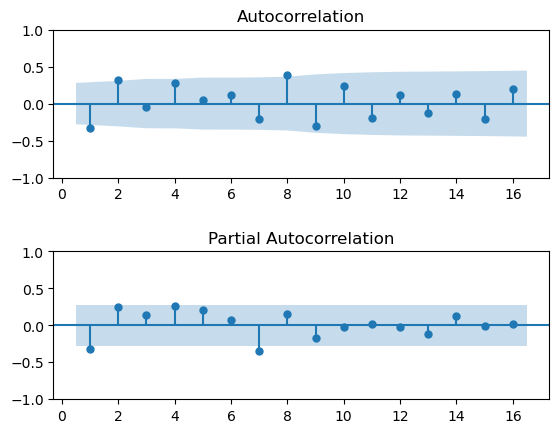

In [14]:
#RANDOMNESS OF FESIDUALS
_, pval_runs_res = runstest_1samp(residuals, correction=False)
print('Runs test p-value on the residuals = {:.3f}'.format(pval_runs_res))
fig, ax = plt.subplots(2, 1)
sgt.plot_acf(residuals, lags = int(len(data)/3), zero=False, ax=ax[0])
fig.subplots_adjust(hspace=0.5)
sgt.plot_pacf(residuals, lags = int(len(data)/3), zero=False, ax=ax[1], 
            method = 'ywm')
plt.show()

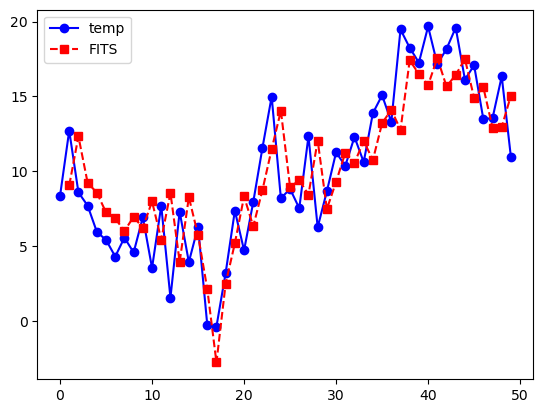

In [15]:
plt.plot(data['Concentration'], color='b', linestyle='-', marker='o', label='temp')
plt.plot(results.fittedvalues, color='r', linestyle='--', marker='s', label='FITS')
plt.legend()
plt.show()

>## Point 2

In [16]:
print(results.params)

const    2.7795
lag1     0.7516
dummy   -5.3544
dtype: float64


In [22]:
data_predict = pd.DataFrame({'const': [1],'lag1': [data['Concentration'].iat[-1]], 'dummy':[0] })

In [23]:
#predict the next value
prediction = results.predict(data_predict)
print('The predicted value is %.3f.' % (prediction[0]))

The predicted value is 11.010.


In [24]:
# Compute the fit, confidence intervals and prediction intervals
prediction_summary = results.get_prediction(data_predict).summary_frame(alpha=0.05)
print(prediction_summary)

      mean  mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  obs_ci_upper
0  11.0098   0.4528        10.0984        11.9212        4.7292       17.2904


>## Point 3

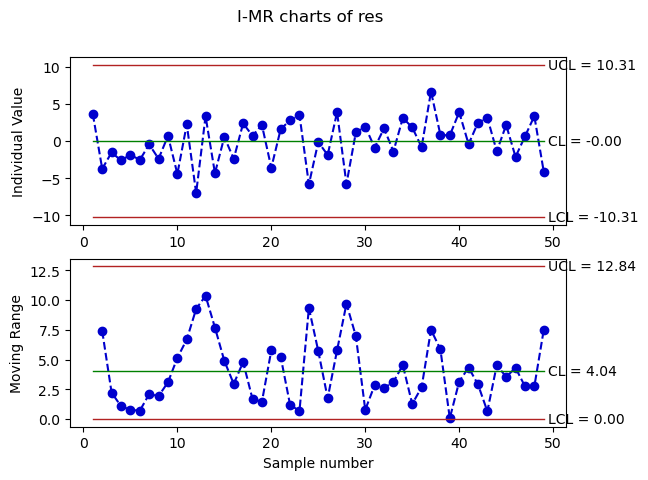

In [25]:
ARL=250
alpha=1/ARL
K_alpha=stats.norm.ppf(1-alpha/2)

# Put the residuals in a dataframe
df_SCC = pd.DataFrame(results.resid, columns=['res'])

# Plot the IMR control chart
df_SCC_IMR = qda.ControlCharts.IMR(df_SCC, 'res',K=K_alpha)

>## Point 4

In [30]:
n=len(residuals)
s=residuals.std()
sigma_0=2.5
chi20=(n-1)*s*s/(sigma_0*sigma_0)
reject=stats.chi2.ppf(1-alpha,n-1)
print(chi20)
print(reject)

70.14405176274953
77.99140340590148
